In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color:#3636ff; font-family:Orbitron; text-shadow:5px 5px 5px #aaa;}
a {color:#3636ff;}
div.output_area pre, div.output_area html {font-size:100%; color:#3636ff;}     
</style>

## For creating posts

# If you want to create a toy dataset 
# for applying any clustering algorithm
Jupyter Notebook & Python Kernel

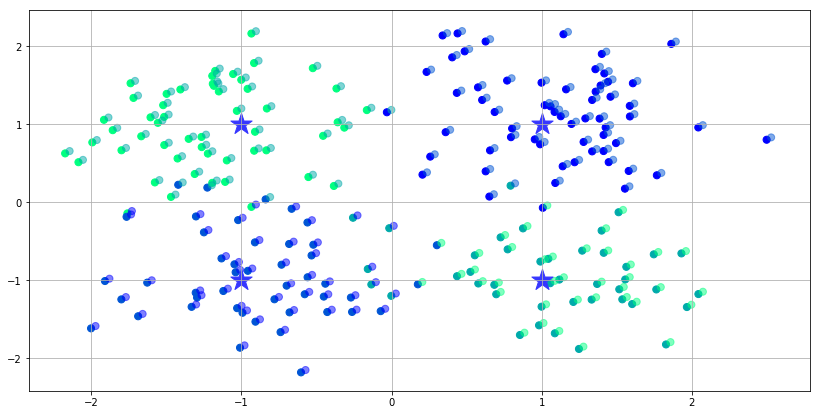

In [48]:
# 1000 data points, 4 clusters
from sklearn import datasets, mixture; from sklearn.model_selection import train_test_split
bd = datasets.make_blobs(n_samples=1000,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],cluster_std=0.5)
X,y = bd[0],bd[1]; X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

usl = mixture.BayesianGaussianMixture(n_components=4,n_init=4)
usl.fit(X_train,y_train); y_predict = usl.predict(X_test)

import pylab; pylab.figure(figsize=(14,7)); pylab.grid()
pylab.scatter(X_test[:,0],X_test[:,1],c=y_test,s=50,cmap=pylab.cm.winter)
pylab.scatter(X_test[:,0]+0.03,X_test[:,1]+0.03,c=y_predict,s=50,alpha=0.5,cmap=pylab.cm.winter)
pylab.scatter([1,-1,1,-1],[1,-1,-1,1],c='#3636ff',marker='*',s=500);

# If you want to imagine text vectorization
# It takes a few seconds
Jupyter Notebook & Python Kernel

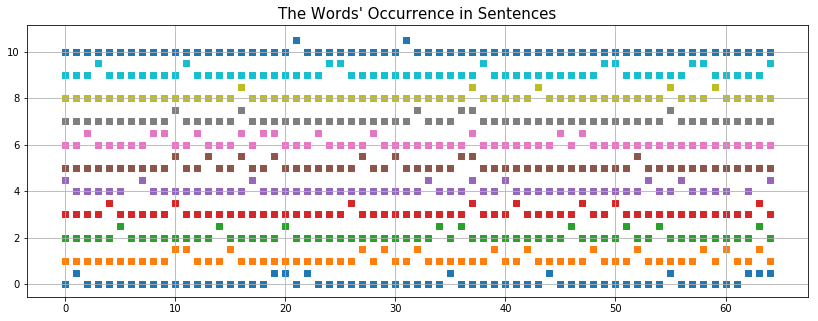

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']
c_vectorizer = CountVectorizer(min_df=1); corpus_features = c_vectorizer.fit_transform(corpus)
corpus_array = corpus_features.toarray().astype('int16'); c_analyzer = c_vectorizer.build_analyzer()
import pylab; pylab.figure(figsize=(14,5)); pylab.grid()
pylab.title("The Words' Occurrence in Sentences",fontsize=15)
for i in range(len(corpus_array)):
    pylab.scatter(range(len(corpus_array[i])),(corpus_array[i]*0.5+i),marker='s')

In [50]:
print("Vocabulary: ",c_vectorizer.get_feature_names()); print("Words in the first sentence: ",c_analyzer(corpus[0]))

Vocabulary:  ['actions', 'already', 'and', 'at', 'basis', 'believe', 'can', 'control', 'cooking', 'day', 'do', 'english', 'every', 'example', 'experts', 'fluent', 'focus', 'focusing', 'food', 'for', 'goals', 'good', 'have', 'healthy', 'improve', 'invent', 'is', 'kilos', 'light', 'lose', 'losing', 'luck', 'marathon', 'means', 'need', 'new', 'not', 'on', 'one', 'or', 'rather', 'regular', 'run', 'schedule', 'set', 'shopping', 'some', 'something', 'speak', 'step', 'system', 'systems', 'ten', 'than', 'that', 'the', 'this', 'time', 'to', 'training', 'want', 'what', 'year', 'you', 'your']
Words in the first sentence:  ['have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'new', 'year']


# If you think it's hard to create word clouds
# You know some people have done this job for you
Jupyter Notebook & Python Kernel

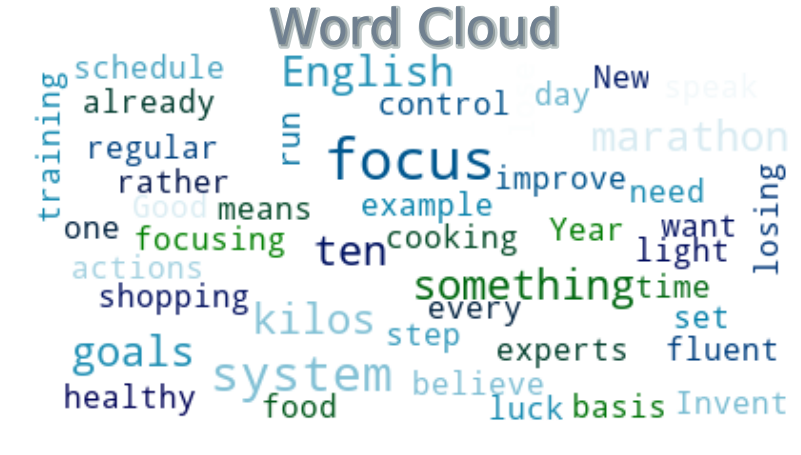

In [38]:
import pylab, numpy; import matplotlib.patheffects as PE
from wordcloud import WordCloud as WC
corpus = ['Have you already set your goals for the New Year?', 
          'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
          'Some experts believe that you need systems, not goals.', 
          'A system is something you do on a regular basis. ',
          'This means focusing on what you can control (your actions) rather than what you can’t.',
          'For example, do not focus on losing ten kilos.',
          'Focus on shopping for healthy food and cooking something light every day.',
          'Do not focus on the marathon.',
          'Focus on the training schedule.',
          'Invent a system to improve your English, one step at a time.',
          'Good luck!']
words = []; [words.append(word) for i in range(len(corpus)) for word in corpus[i].split()];
wordcloud = WC(max_font_size=30,background_color='white',colormap=pylab.cm.ocean).generate(' '.join(words))
pe = [PE.withSimplePatchShadow(linewidth=5, foreground="darkslategray")]
pylab.figure(figsize=(14,7)); pylab.imshow(wordcloud,interpolation="bilinear")
pylab.title("Word Cloud",fontsize=50,color='slategray',path_effects=pe); pylab.axis("off");

# If you want to imagine dictionary vectorization
# Here it is
Jupyter Notebook & Python Kernel

In [12]:
global_station_temperature = \
[{'year':2017,'month':'Jan','temperature':113},{'year':2017,'month':'Feb','temperature':141},
 {'year':2017,'month':'Mar','temperature':137},{'year':2017,'month':'Apr','temperature':115},
 {'year':2017,'month':'May','temperature':122},{'year':2017,'month':'Jun','temperature':76},
 {'year':2017,'month':'Jul','temperature':108},{'year':2017,'month':'Aug','temperature':110},
 {'year':2017,'month':'Sep','temperature':96},{'year':2017,'month':'Oct','temperature':115},
 {'year':2017,'month':'Nov','temperature':105},{'year':2017,'month':'Dec','temperature':115},
 {'year':2018,'month':'Jan','temperature':103},{'year':2018,'month':'Feb','temperature':114},
 {'year':2018,'month':'Mar','temperature':121},{'year':2018,'month':'Apr','temperature':120},
 {'year':2018,'month':'May','temperature':100},{'year':2018,'month':'Jun','temperature':86},
 {'year':2018,'month':'Jul','temperature':106},{'year':2018,'month':'Aug','temperature':90},
 {'year':2018,'month':'Sep','temperature':89},{'year':2018,'month':'Oct','temperature':111},
 {'year':2018,'month':'Nov','temperature':97},{'year':2018,'month':'Dec','temperature':121}]
from sklearn.feature_extraction import DictVectorizer; DV = DictVectorizer()
temperature_features = DV.fit_transform(global_station_temperature).toarray().astype('int16')
print(temperature_features[:3],'\n', DV.get_feature_names()[:7],'\n',DV.get_feature_names()[7:])

[[   0    0    0    0    1    0    0    0    0    0    0    0  113 2017]
 [   0    0    0    1    0    0    0    0    0    0    0    0  141 2017]
 [   0    0    0    0    0    0    0    1    0    0    0    0  137 2017]] 
 ['month=Apr', 'month=Aug', 'month=Dec', 'month=Feb', 'month=Jan', 'month=Jul', 'month=Jun'] 
 ['month=Mar', 'month=May', 'month=Nov', 'month=Oct', 'month=Sep', 'temperature', 'year']


# If you think you can draw only with lines or points 
# Just try 3D voxels
Jupyter Notebook & Python Kernel

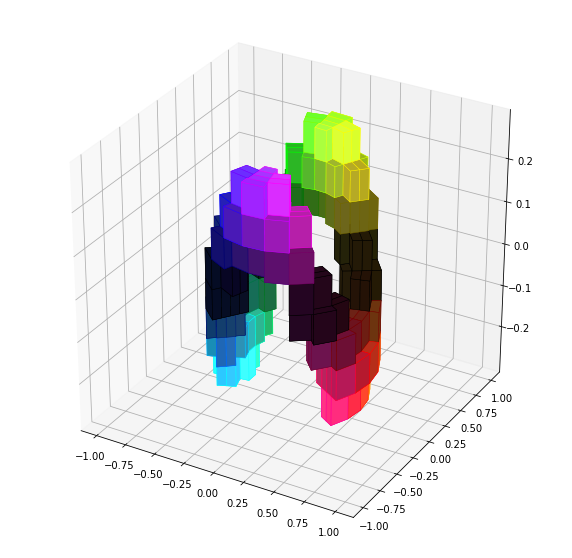

In [232]:
import numpy,pylab,matplotlib.colors; from mpl_toolkits.mplot3d import Axes3D
r,theta,z = numpy.mgrid[0:1:15j,0:2*numpy.pi:24j,-0.5:0.5:15j]
x,y = r*numpy.cos(theta),r*numpy.sin(theta)
def mid(t):
    c = ()
    for i in range(t.ndim):
        t = (t[c+numpy.index_exp[:-1]]+t[c+numpy.index_exp[1:]])/2.0
        c += numpy.index_exp[:]
    return t
mr,mtheta,mz = mid(r),mid(theta),mid(z); 
form = (mr-0.5)**2+(mz+0.2*numpy.cos(mtheta*2))**2<0.12**2
hsv = numpy.zeros(form.shape+(3,))
hsv[...,0],hsv[...,1],hsv[...,2] = mtheta/(2*numpy.pi),mr**0.3,numpy.abs(mz*4)
rgb = matplotlib.colors.hsv_to_rgb(hsv)
f = pylab.figure(figsize=(10,10)); ax = f.gca(projection='3d'); ax.set_zlim(-0.3,0.3)
ax.voxels(x,y,z,form,facecolors=rgb,edgecolors=numpy.clip(2*rgb-0.4,0,1),linewidth=0.5);